In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
tqdm.pandas(leave = False)

from transformers import (
    AutoTokenizer,
    RobertaTokenizer,
    RobertaForMaskedLM,
    pipeline,
)

from ..balm.config import BalmConfig, BalmMoEConfig
from ..balm.data import load_dataset, DataCollator
from ..balm.models import (
    BalmForMaskedLM,
    BalmModel,
    BalmMoEForMaskedLM,
)
from ..balm.tokenizer import Tokenizer

from itertools import chain
import torch
import torch.nn.functional as F
import abstar
import abutils

In [2]:
stats_muted = pd.read_csv("./inferencebyregion_muted_balmMoE_balm.csv")
stats_germ = pd.read_csv("./inferencebyregion_germ_balmMoE_balm.csv")

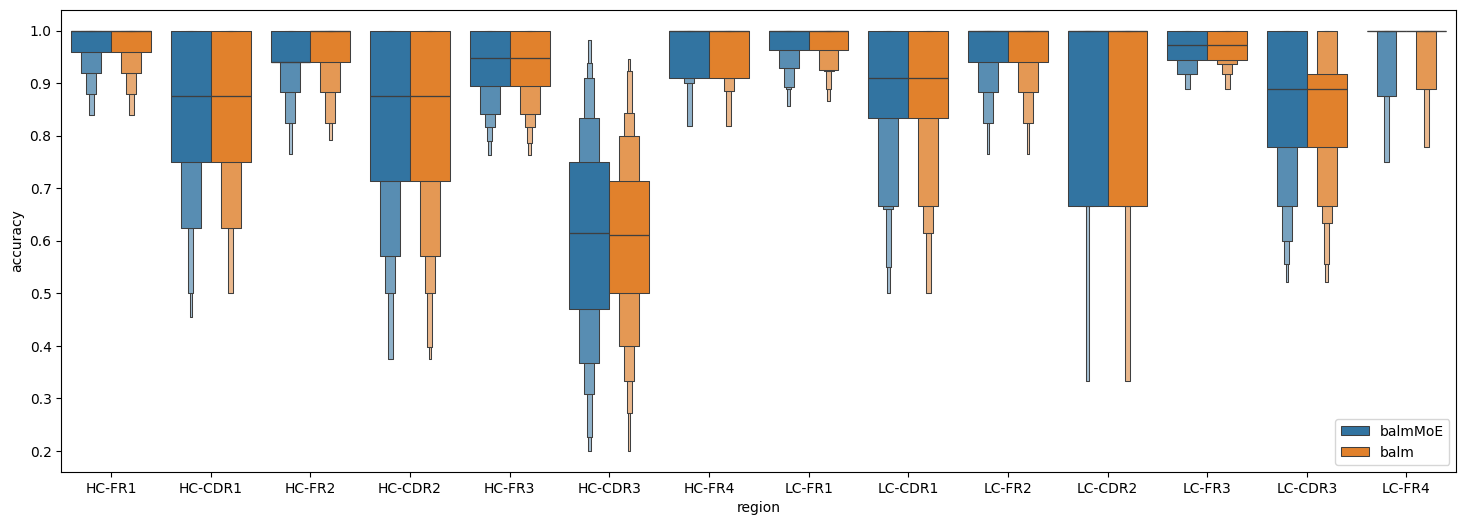

In [3]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxenplot(x="region", y="accuracy", hue="model", 
              data=stats_muted, ax = ax, showfliers=False)
ax.legend(loc="lower right")
plt.savefig("./regional_accuracy_muted_balmMoE_balm.pdf")

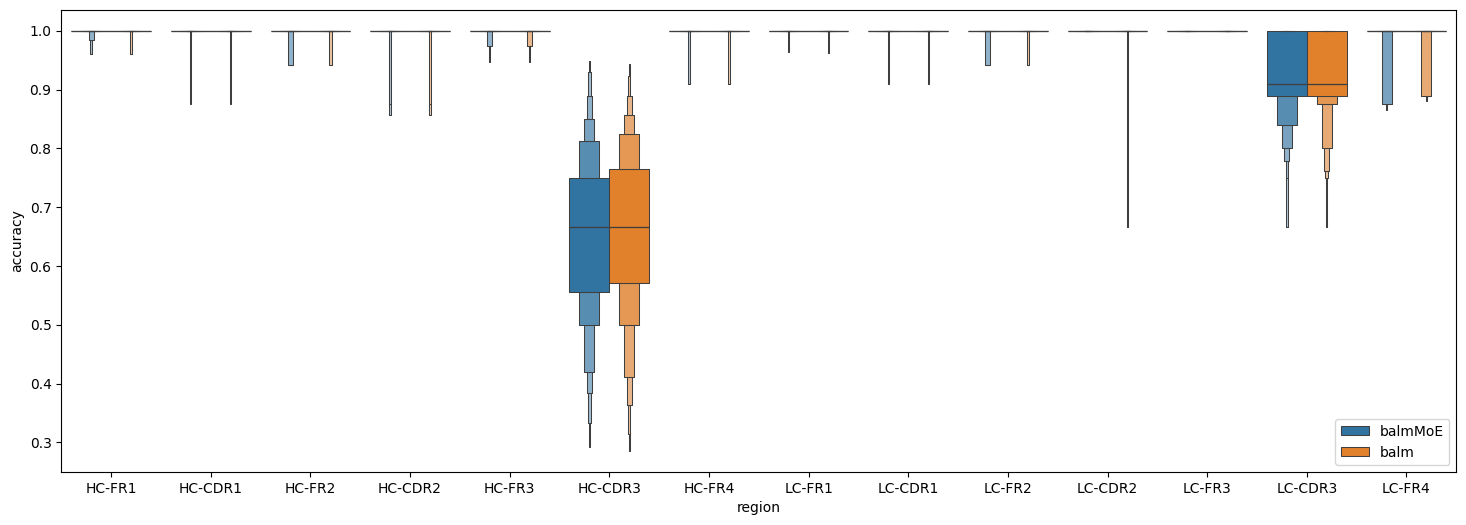

In [4]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxenplot(x="region", y="accuracy", hue="model", 
              data=stats_germ, ax = ax, showfliers=False)
ax.legend(loc="lower right")
plt.savefig("./regional_accuracy_germ_balmMoE_balm.pdf")

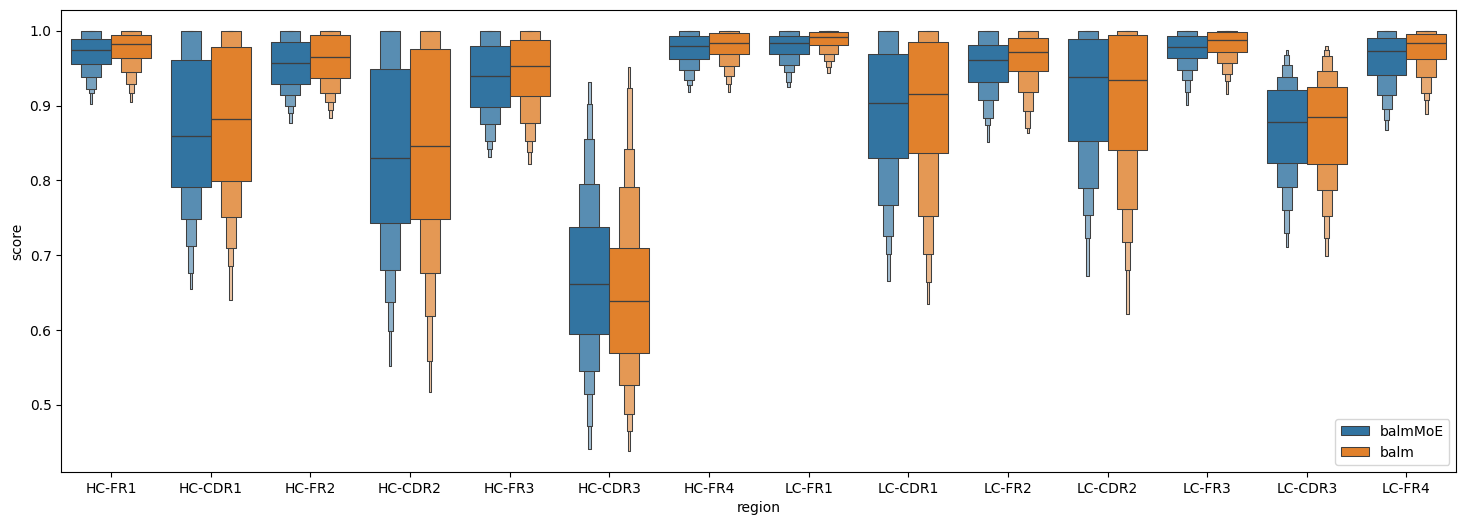

In [5]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxenplot(x="region", y="score", hue="model", 
              data=stats_muted, ax = ax, showfliers=False)
ax.legend(loc="lower right")
plt.savefig("./regional_scores_muted_balmMoE_balm.pdf")

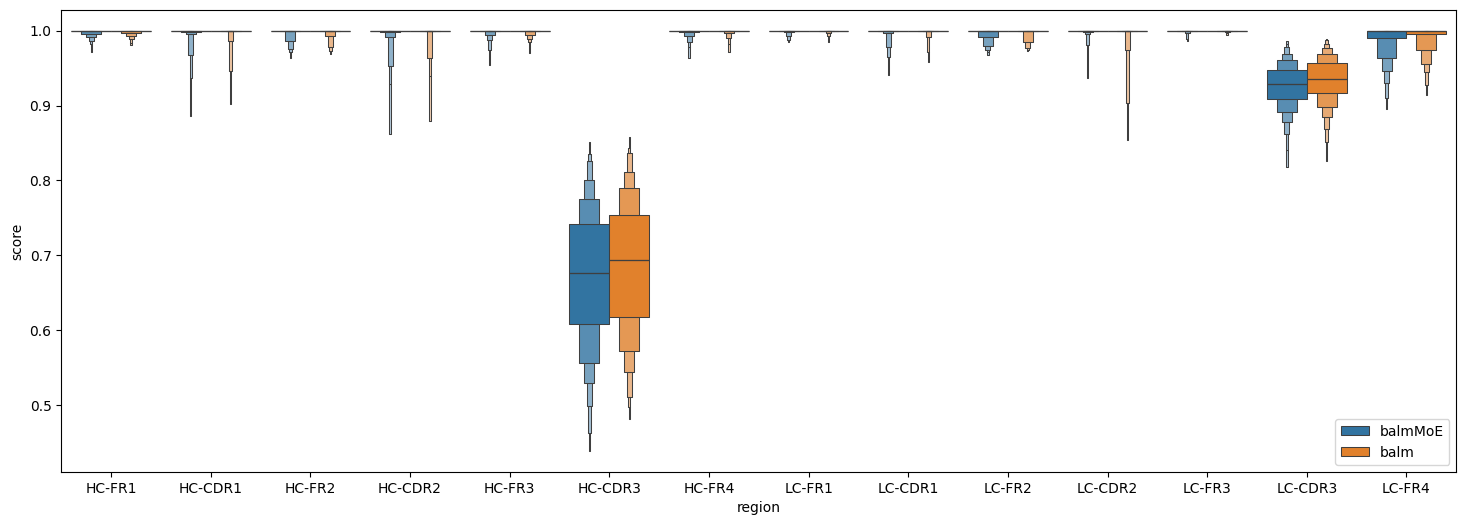

In [6]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxenplot(x="region", y="score", hue="model", 
              data=stats_germ, ax = ax, showfliers=False)
ax.legend(loc="lower right")
plt.savefig("./regional_scores_germ_balmMoE_balm.pdf")

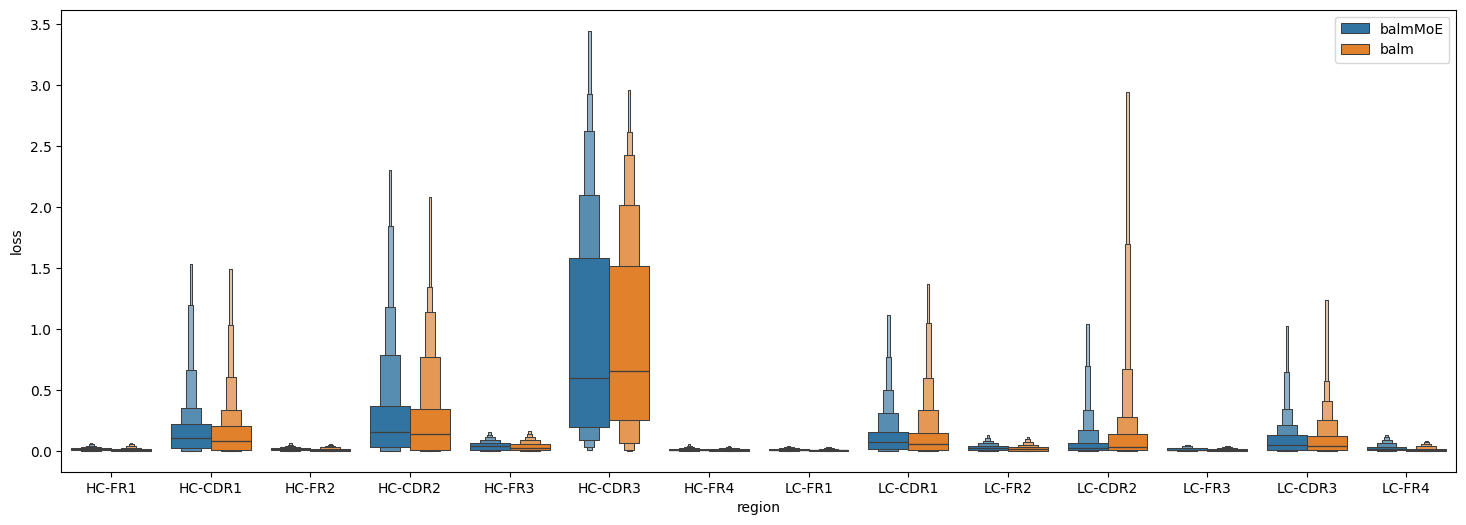

In [7]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxenplot(x="region", y="loss", hue="model", 
              data=stats_muted, ax = ax, showfliers=False)
ax.legend(loc="upper right")
plt.savefig("./regional_loss_muted_balmMoE_balm.pdf")

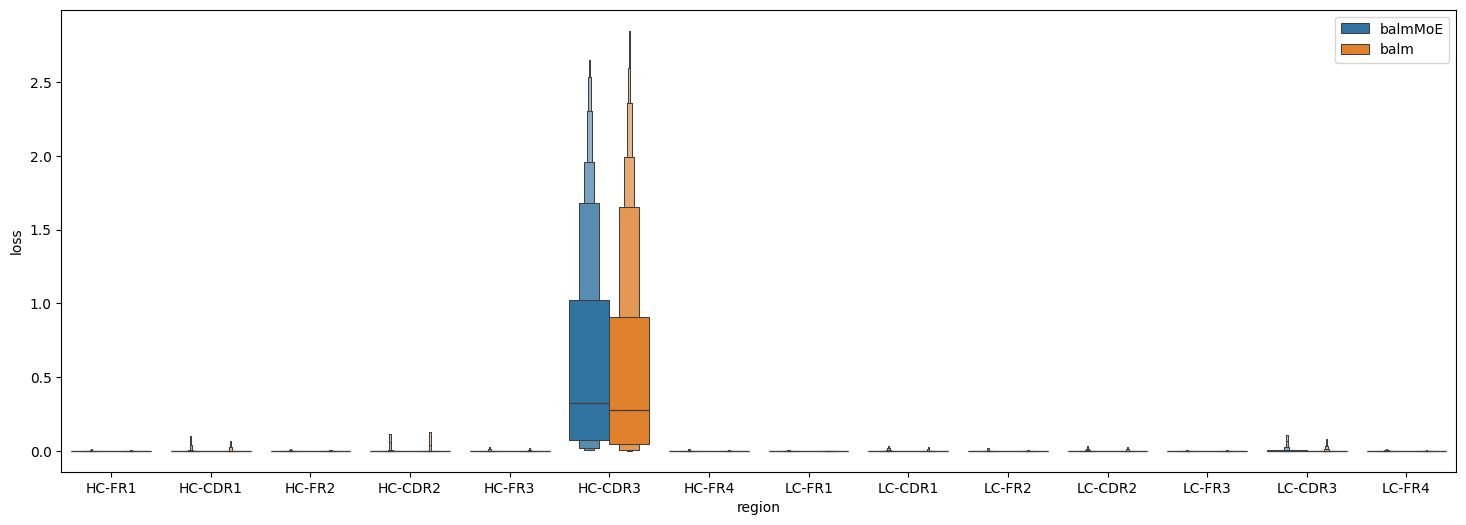

In [9]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxenplot(x="region", y="loss", hue="model", 
              data=stats_germ, ax = ax, showfliers=False)
ax.legend(loc="upper right")
plt.savefig("./regional_loss_germ_balmMoE_balm.pdf")

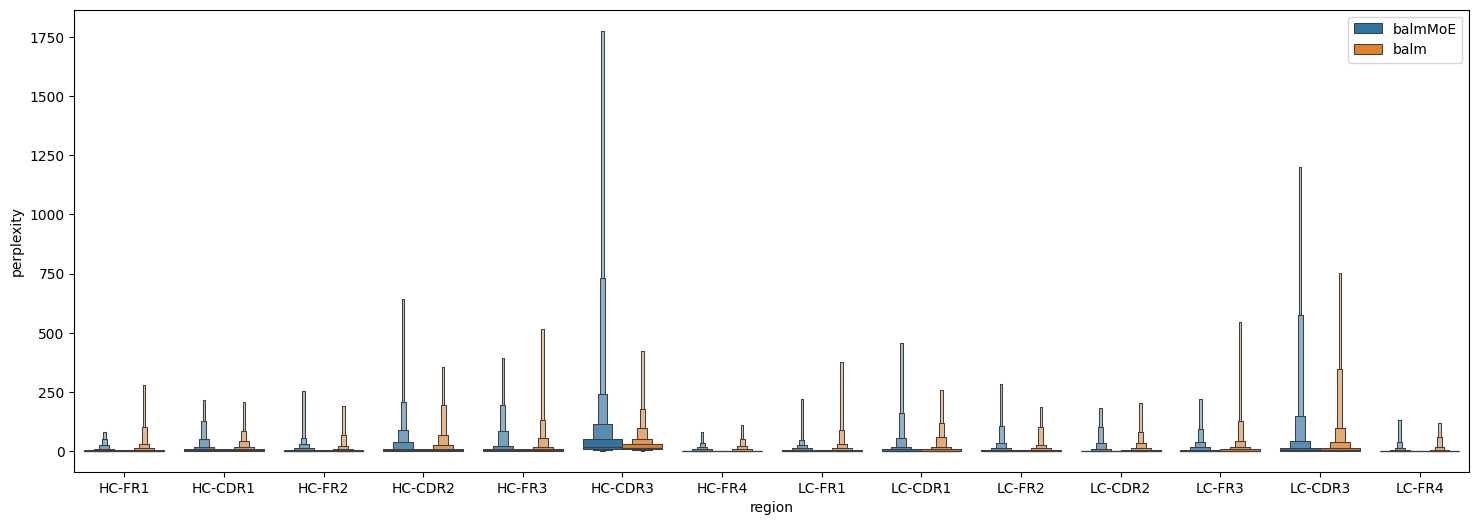

In [10]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxenplot(x="region", y="perplexity", hue="model", 
              data=stats_muted, ax = ax, showfliers=False)
ax.legend(loc="upper right")
plt.savefig("./regional_perplexity_muted_balmMoE_balm.pdf")

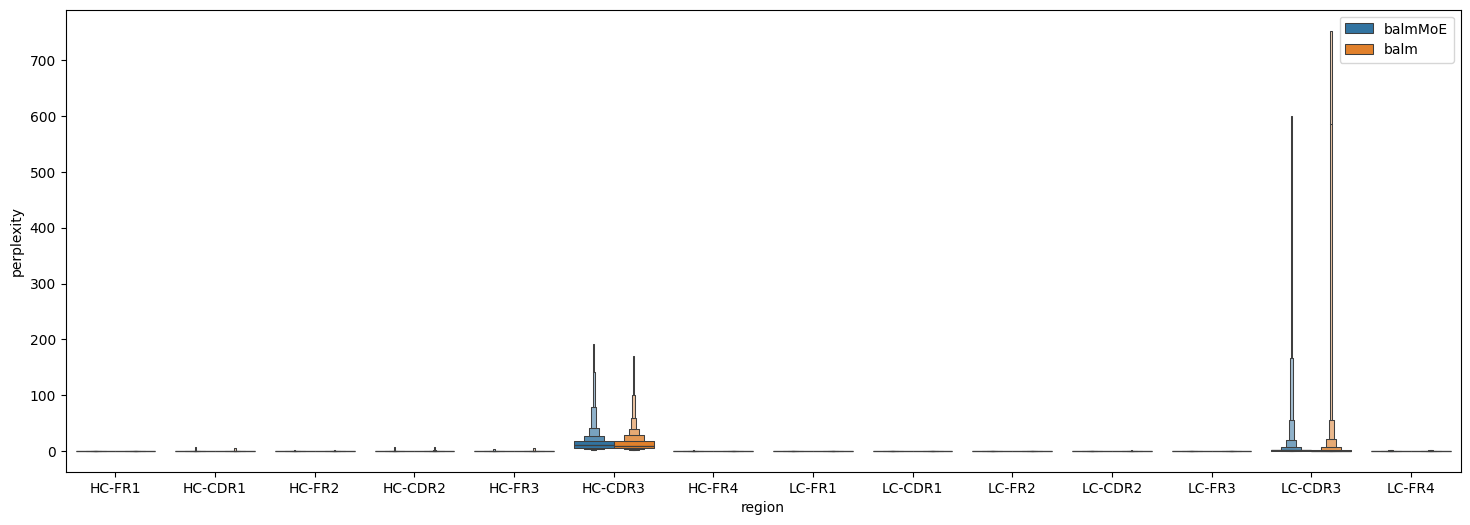

In [11]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxenplot(x="region", y="perplexity", hue="model", 
              data=stats_germ, ax = ax, showfliers=False)
ax.legend(loc="upper right")
plt.savefig("./regional_perplexity_germ_balmMoE_balm.pdf")

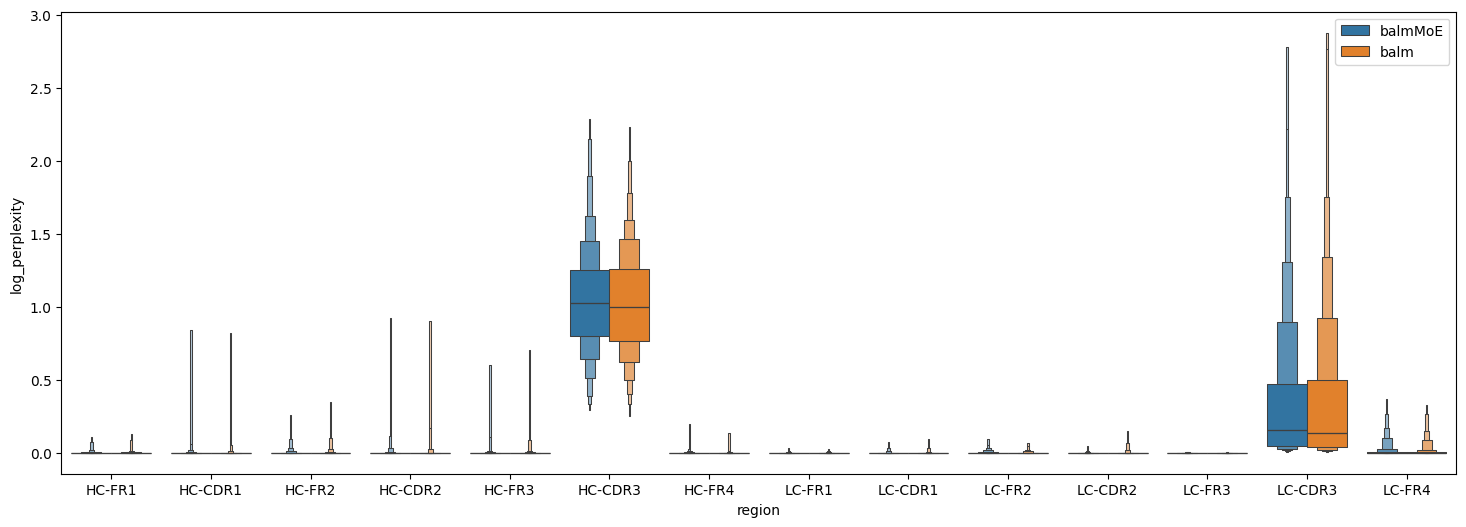

In [14]:
stats_germ['log_perplexity'] = np.log10(stats_germ['perplexity'])
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxenplot(x="region", y="log_perplexity", hue="model", 
              data=stats_germ, ax = ax,  showfliers=False)
ax.legend(loc="upper right")
plt.savefig("./regional_logperplexity_germ_balmMoE_balm.pdf")

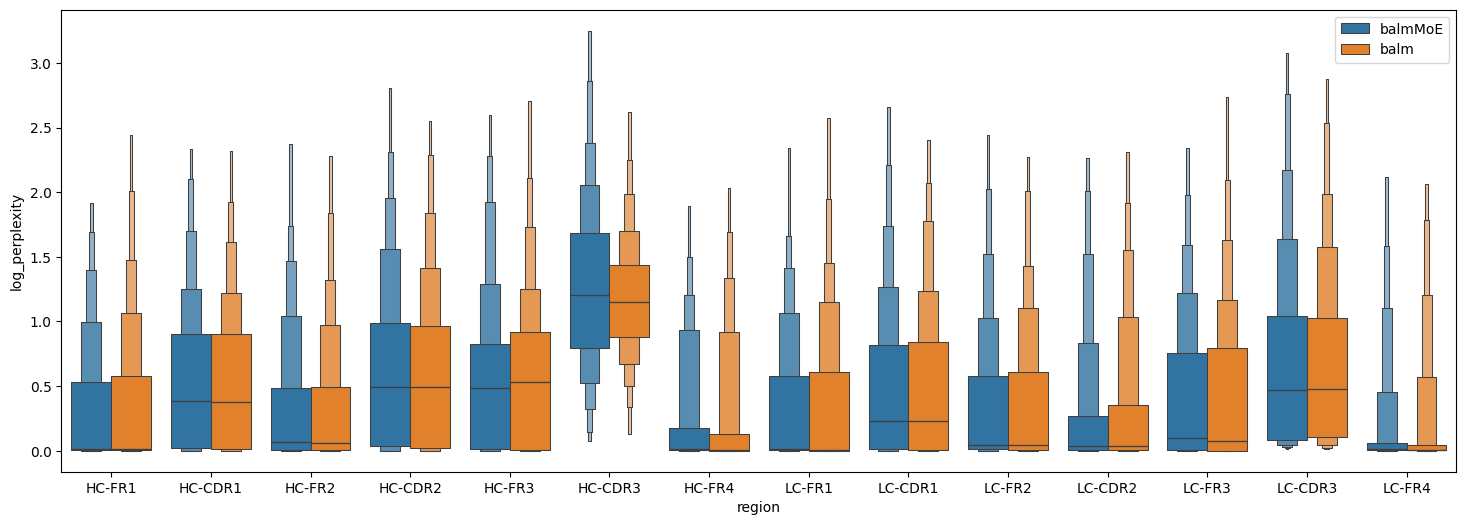

In [15]:
stats_muted['log_perplexity'] = np.log10(stats_muted['perplexity'])
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxenplot(x="region", y="log_perplexity", hue="model", 
              data=stats_muted, ax = ax, showfliers=False)
ax.legend(loc="upper right")
plt.savefig("./regional_logperplexity_muted_balmMoE_balm.pdf")

In [20]:
# closer look at just cdr3
# above plots but just cdr3 of HC and LC -> maybe can see better if they are bigger
# cdr3 length vs stats (might be interesting but not sure how it would be helpful)
stats_df3 = pd.read_csv("./inferencebyCDRlength_germ_balmMoE_balm.csv")
stats_df4 = pd.read_csv("./inferencebyCDRlength_muted_balmMoE_balm.csv")
cdr3_len_df = pd.concat([stats_df3, stats_df3])

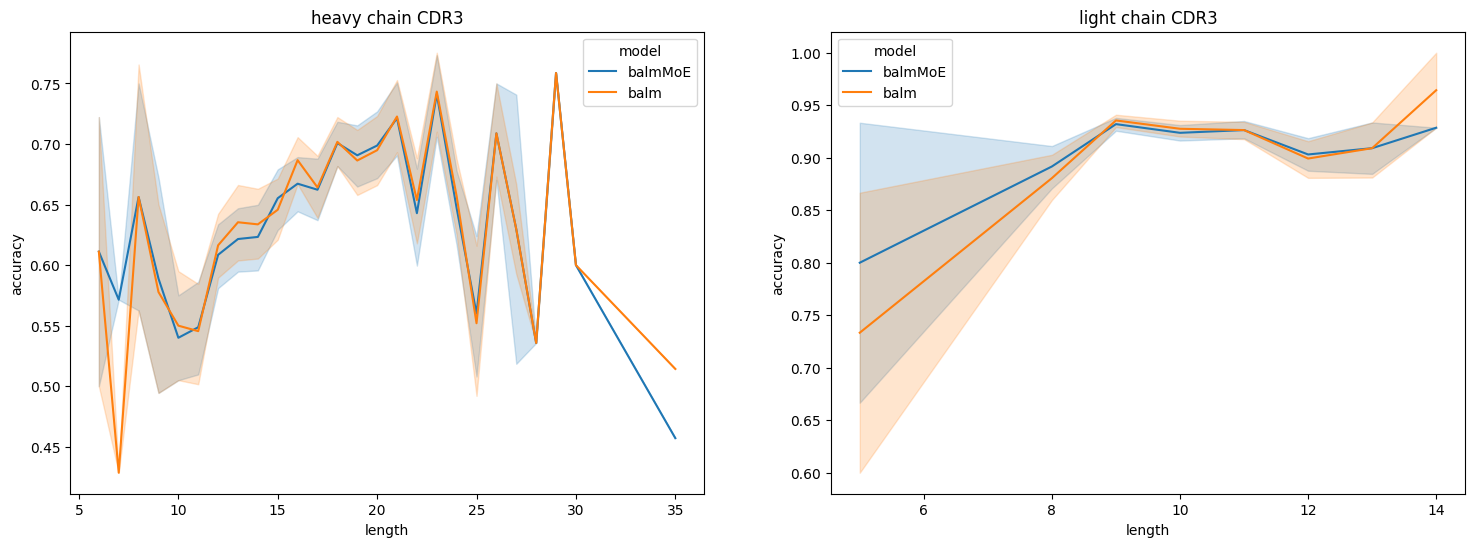

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
sns.lineplot(data=cdr3_len_df[cdr3_len_df["region"] == "hcdr3"], ax = axs[0],
             x="length", y="accuracy", hue="model")
axs[0].set_title("heavy chain CDR3")

sns.lineplot(data=cdr3_len_df[cdr3_len_df["region"] == "lcdr3"], ax = axs[1],
             x="length", y="accuracy", hue="model")
axs[1].set_title("light chain CDR3")
plt.savefig("./regional_accuracy_cdrlength_balmMoE_balm.pdf")